<a href="https://colab.research.google.com/github/rgw3wgs/kmc/blob/main/KMC_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1. This question is a case study for k means clustering.**


*1. Load the airbnb_hw.csv data. Clean Price along with Beds, Number of Reviews, and Review Scores Rating.*

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [213]:
airbnb = pd.read_csv('airbnb_hw.csv')
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [214]:
airbnb['num_reviews'] = airbnb['Number Of Reviews']
airbnb['score'] = airbnb['Review Scores Rating']

airbnb = airbnb.loc[:,['Price', 'Beds', 'num_reviews', 'score']]
print(airbnb.shape)
airbnb.describe()



(30478, 4)


,Beds,num_reviews,score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [216]:
pd.crosstab(airbnb['score'].isnull(), airbnb['num_reviews']>0)

num_reviews,False,True
score,,
False,0,22155
True,7814,509


In [217]:
airbnb['Price'].value_counts()
airbnb['Price'] = airbnb['Price'].str.replace(',','')
airbnb['Price'] = pd.to_numeric(airbnb['Price'],errors='coerce')
airbnb.describe()

,Price,Beds,num_reviews,score
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [228]:
# Drop NA's because there are a
airbnb.dropna(inplace=True)
print(airbnb.shape)
airbnb.describe()

(22111, 5)


,Price,Beds,num_reviews,score,Cluster
count,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000
mean,154.798697,1.558093,16.523179,91.991633,1.881326
std,148.901275,1.044014,24.322185,8.851965,1.461129
min,10.000000,0.000000,1.000000,20.000000,0.000000
25%,85.000000,1.000000,3.000000,89.000000,1.000000
50%,125.000000,1.000000,7.000000,94.000000,1.000000
75%,190.000000,2.000000,20.000000,100.000000,2.000000
max,10000.000000,16.000000,257.000000,100.000000,5.000000


*2. Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).*

In [219]:
def maxmin(x):
  return(x-min(x))/(max(x) - min(x))

airbnb2 = airbnb.drop('Price', axis=1)
airbnb2 = airbnb2.apply(maxmin)

*3. Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.*

In [229]:
k = 6
a = 13
b = 10
c = 300

kmeans = KMeans(n_clusters=k, max_iter = c, n_init = b, random_state = a)
kmeans = kmeans.fit(airbnb2)
airbnb2['Cluster'] = kmeans.labels_


In [230]:
airbnb2.describe()

,Beds,num_reviews,score,Cluster
count,22111.000000,22111.000000,22111.000000,22111.000000
mean,0.097381,0.060637,0.899895,1.483108
std,0.065251,0.095009,0.110650,1.108118
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.007812,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


*4. Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.*

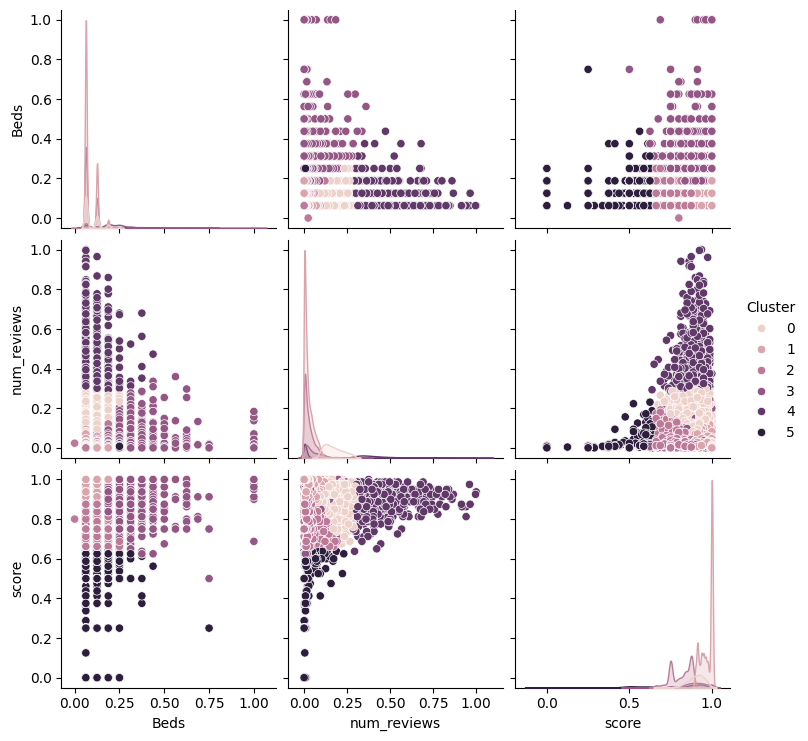

In [231]:
sns.pairplot(data=airbnb2, hue='Cluster')
plt.show()

*5. Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?*

In [232]:
airbnb['Cluster'] = kmeans.labels_
airbnb.loc[:,['Price', 'Cluster'] ].groupby('Cluster').describe()

Price                                                             
           count        mean         std   min     25%    50%    75%      max
Cluster                                                                      
0         3022.0  141.703177   84.214663  22.0   87.25  125.0  175.0   1000.0
1        10491.0  152.199600  147.277659  10.0   85.00  130.0  190.0  10000.0
2         5547.0  131.671174  102.821180  20.0   75.00  110.0  169.0   5000.0
3         1627.0  293.440688  262.877909  27.0  150.00  229.0  350.0   4500.0
4          793.0  133.311475   83.104413  27.0   80.00  110.0  169.0    875.0
5          631.0  133.561014  215.675540  25.0   65.00   99.0  152.5   5000.0

The cluster with the highest rental price for my data is cluster 3. It has a mean rental price of $293 a night and is also more expensive in the 25, 50 and 75 percentile ranges.

*6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5*

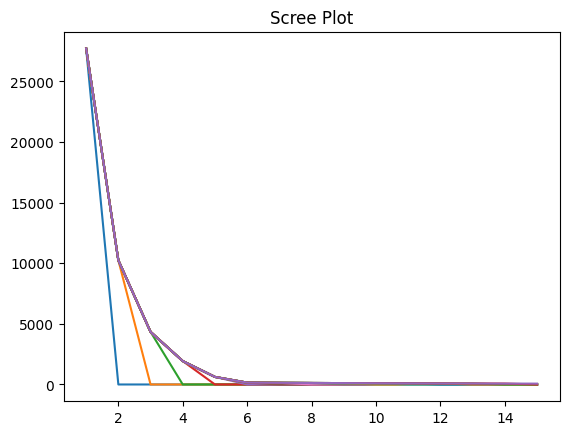

In [236]:
bar = 15
SSE = np.zeros(bar)
for i in range(bar):
  kmeans = KMeans(n_clusters=i+1, max_iter=300, n_init=10, random_state=13)
  kmeans = kmeans.fit(airbnb2)
  SSE[i] = kmeans.inertia_

  sns.lineplot(x=np.arange(1,bar+1), y=SSE).set_title('Scree Plot')

I don't exactly know why I am getting multiple lines. However, based on the plot I would say my elbow is around 2 if I average it out.

Price                                                           
           count        mean         std   min   25%    50%    75%      max
Cluster                                                                    
0        13513.0  149.852216  135.809768  10.0  85.0  129.0  185.0  10000.0
1         7174.0  168.359074  168.608159  20.0  82.0  130.0  199.0   5000.0
2         1424.0  133.422051  156.325712  25.0  70.0  100.0  165.0   5000.0

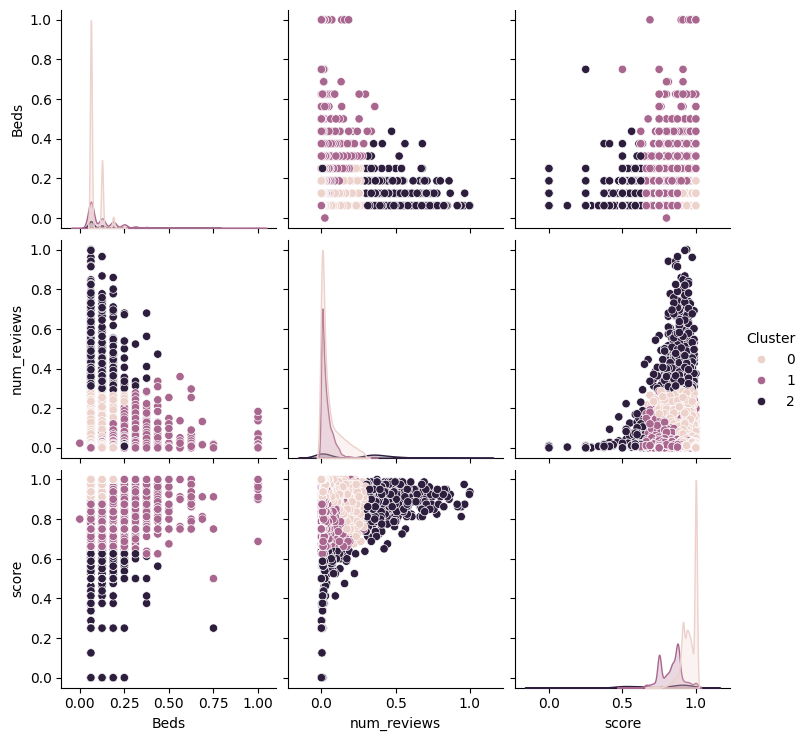

In [238]:
kmeans = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=13)
kmeans = kmeans.fit(airbnb2)
airbnb2['Cluster'] = kmeans.labels_

sns.pairplot(data=airbnb2, hue='Cluster')

airbnb["Cluster"] = kmeans.labels_
airbnb.loc[:,['Price','Cluster'] ].groupby('Cluster').describe()

- Cluster 0 has the fewest reviews
- Cluster 2 has the lowest average price and Cluster 1 has the highest average price


**Q2. This is a question about k means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking k.**

*1. Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.*

In [150]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

*2. Make scatterplots of the
 points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?*

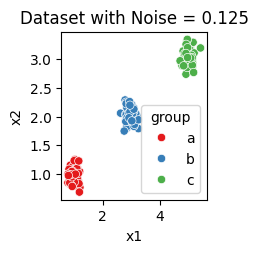

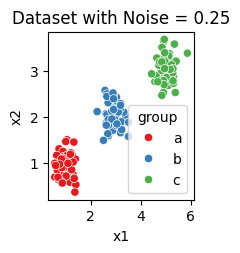

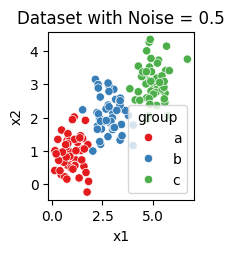

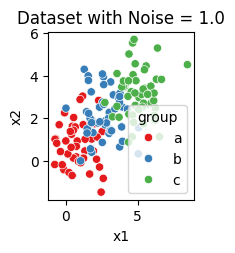

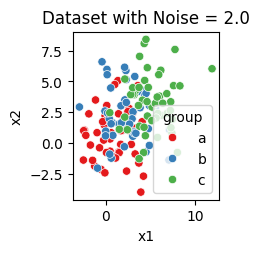

In [155]:

datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
noise = [0.125, 0.25, 0.5, 1.0, 2.0]

for i in range(len(datasets)):
  plt.subplot(2,3,i+1)
  sns.scatterplot(data=datasets[i], x='x1', y='x2', hue='group', palette='Set1', legend='full')
  plt.title(f'Dataset with Noise = {noise[i]}')
  plt.xlabel('x1')
  plt.ylabel('x2')

  plt.show()

As the noise increases the clusters start to intertwine with each other and get larger.

*3. Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a
.*

In [207]:
#Maxmin scaler function
def maxmin_scaler(x):
  x = (x-min(x))/(max(x)-min(x))
  return x

#Scree Plot Function
def scree(data, n_init=10):
    scaled_data = data[['x1', 'x2']].apply(maxmin_scaler)

    # Inertia
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=13)
        kmeans.fit(scaled_data)
        inertias.append(kmeans.inertia_)

    # Plotting
    plt.plot(range(1, 11), inertias, marker='o')
    plt.title('Scree Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.ylim(0, 35)

    plt.show()



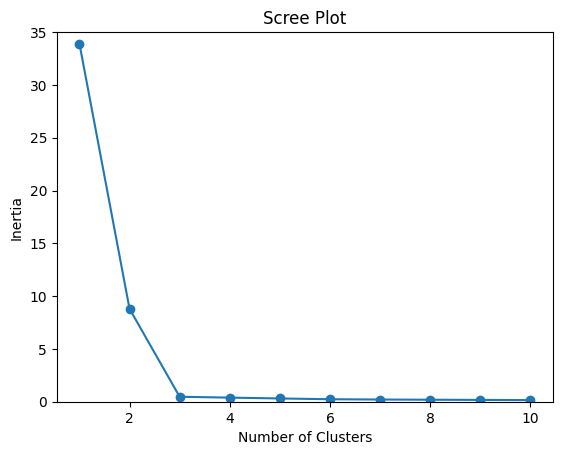

In [208]:
data = createData(0.125)
scree(data)

Elbow at 3

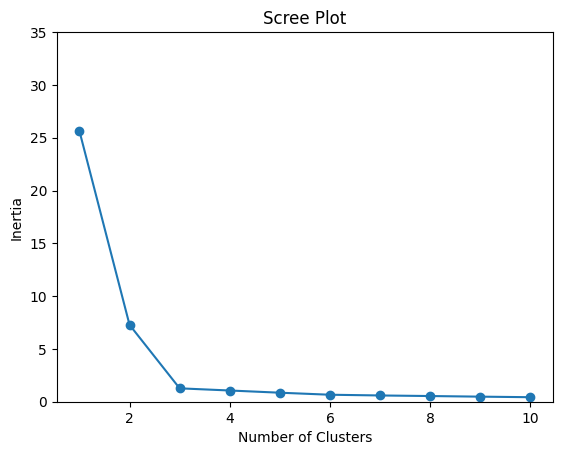

In [209]:
data = createData(0.25)
scree(data)

Elbow at 3

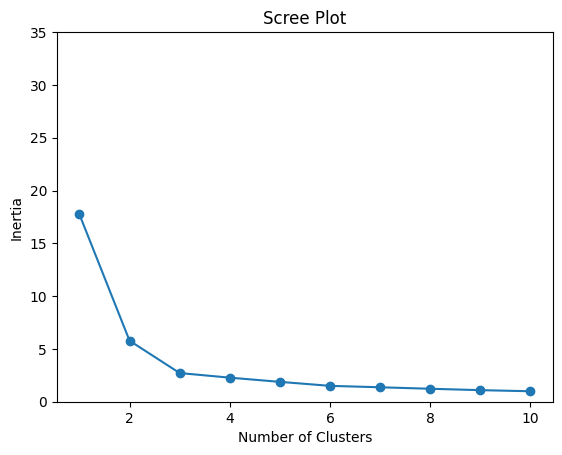

In [210]:
data = createData(0.5)
scree(data)

Elbow at 3

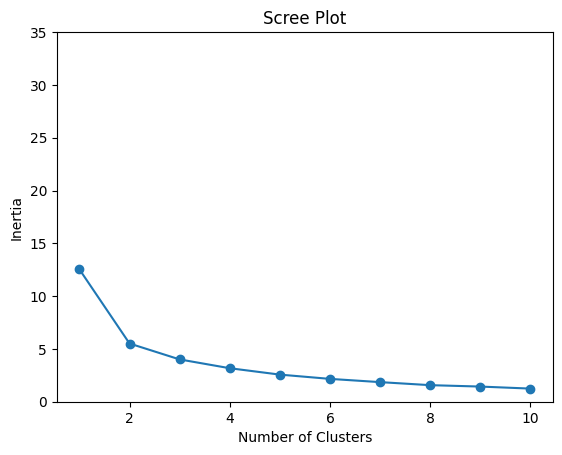

In [204]:
data = createData(1.0)
scree(data)

Elbow around 2

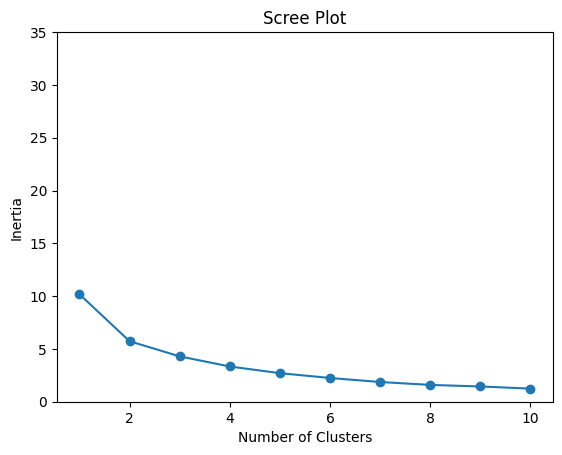

In [205]:
data = createData(2.0)
scree(data)

In [ ]:
slight elbow around 2

The increase in noise presents a flatter line in the scree plots. As the noise goes up these groups identified by the scree plot become less identifiable. The intuition of the elbow is that increasing the number of cluster should improve the fit until it is over-fitting. As the number of clusters increases, the inertia decreases. The elbow shows us the optimal number of clusters and as the noise increases our elbow is going to a smaller number and our data may be better represented by a smaller number.